In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Types of Shapes in Datasets**

In [6]:
blob = pd.read_csv("1.1 cluster_blob.csv")

In [3]:
blob.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [4]:
blob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


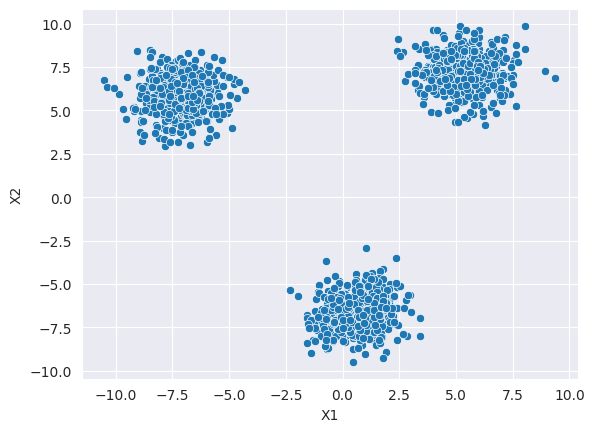

In [5]:
sns.scatterplot(data=blob, x='X1', y='X2')
plt.show()

In [7]:
moon = pd.read_csv("1.2 cluster_moon.csv")

In [7]:
moon.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [8]:
moon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


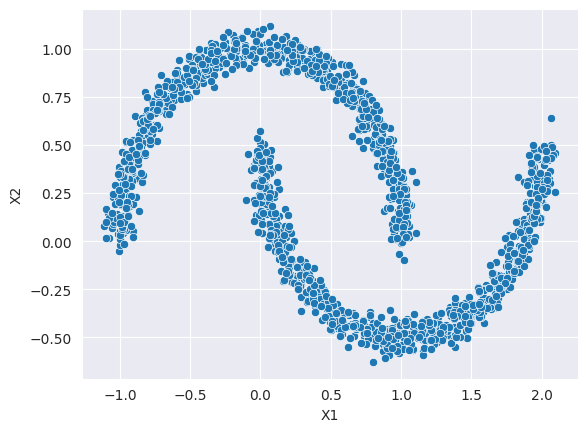

In [9]:
sns.scatterplot(data=moon, x='X1', y='X2')
plt.show()

In [8]:
circle = pd.read_csv("1.3 cluster_circles.csv")

In [11]:
circle.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [12]:
circle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


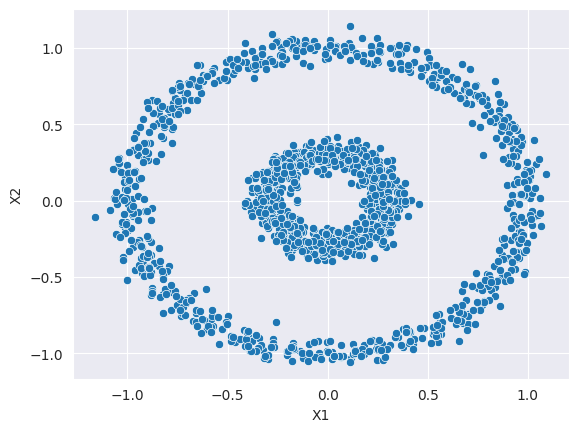

In [13]:
sns.scatterplot(data=circle, x='X1', y='X2')
plt.show()

In [18]:
# Function to display clusters in the data by specific model
def display_categories(model, data):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

# **Analyzing Clusters with K-Medoids**

**Install Dependency and Library for K-Medoids**

In [4]:
!pip install numpy==1.26.4 --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompati

In [1]:
!pip install scikit-learn-extra

In [2]:
from sklearn_extra.cluster import KMedoids

**Functions to Find Optimal K-value by Elbow and Silhoutte Method of any Dataset**

In [12]:
def find_optimal_k_elbow(data, dataset_name="Dataset", k_start=1, k_end=10):
    k_range = range(k_start, k_end + 1)
    wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS)

    print(f"--- Analyzing {dataset_name} (K = {k_start} to {k_end}) ---")

    for k in k_range:
        # 1. Instantiate and Fit KMedoids
        kmedoids = KMedoids(
            n_clusters=k,
            random_state=42,
            metric='euclidean' # Use the same metric as the final model
        )

        kmedoids.fit(data)

        # 2. Store the Inertia (WCSS)
        wcss.append(kmedoids.inertia_)

        print(f"K={k}: Inertia = {kmedoids.inertia_:.2f}")

    # 3. Plot the Elbow Curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='-', color='red')

    plt.title(f'Elbow Method for Optimal K - {dataset_name}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (WCSS)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()


    print("\nInterpretation: The optimal K is found at the **'elbow'** or **'knee'** of the curve, where the decrease in WCSS starts to flatten significantly.")
    print("-" * 50)

In [13]:
def find_optimal_k_silhouette(data, dataset_name="Dataset", k_start=2, k_end=10):
    if k_start < 2:
        k_start = 2

    k_range = range(k_start, k_end + 1)
    silhouette_scores = []
    best_score = -1
    optimal_k = 0

    print(f"--- Analyzing {dataset_name} (K = {k_start} to {k_end}) ---")

    for k in k_range:
        # Instantiate and Fit KMedoids
        kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
        cluster_labels = kmedoids.fit_predict(data)

        # Calculate the Silhouette Score
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)

        # Track the optimal K
        if score > best_score:
            best_score = score
            optimal_k = k

        print(f"K={k}: Average Silhouette Score = {score:.4f}")

    # Plot the Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='green')

    # Highlight the optimal K value
    plt.vlines(optimal_k, ymin=min(silhouette_scores), ymax=best_score,
               linestyles='--', colors='blue',
               label=f'Optimal K = {optimal_k} (Score: {best_score:.4f})')

    plt.title(f'Silhouette Method for Optimal K - {dataset_name}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(k_range)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOptimal K for {dataset_name}: {optimal_k}")
    print("-" * 50)
    return optimal_k

**Finding Optimal K-value and Clusters For Blob**

--- Analyzing Blob (K = 1 to 10) ---
K=1: Inertia = 12904.59
K=2: Inertia = 8102.43
K=3: Inertia = 1898.46
K=4: Inertia = 1770.20
K=5: Inertia = 1682.34
K=6: Inertia = 1552.68
K=7: Inertia = 1425.41
K=8: Inertia = 1368.20
K=9: Inertia = 1337.03
K=10: Inertia = 1243.74


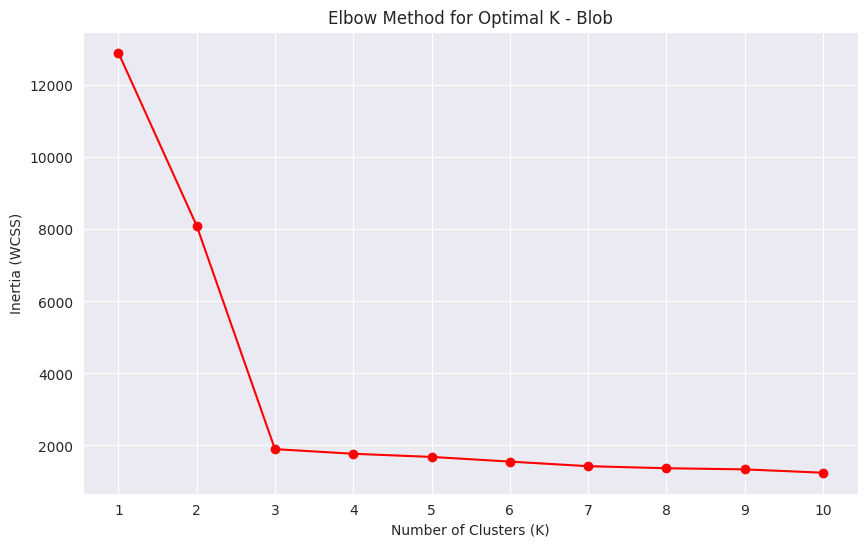


Interpretation: The optimal K is found at the **'elbow'** or **'knee'** of the curve, where the decrease in WCSS starts to flatten significantly.
--------------------------------------------------


In [14]:
find_optimal_k_elbow(blob, dataset_name="Blob")

--- Analyzing Blob (K = 2 to 10) ---
K=2: Average Silhouette Score = 0.5469
K=3: Average Silhouette Score = 0.8625
K=4: Average Silhouette Score = 0.6783
K=5: Average Silhouette Score = 0.6801
K=6: Average Silhouette Score = 0.4980
K=7: Average Silhouette Score = 0.3200
K=8: Average Silhouette Score = 0.3198
K=9: Average Silhouette Score = 0.3166
K=10: Average Silhouette Score = 0.3259


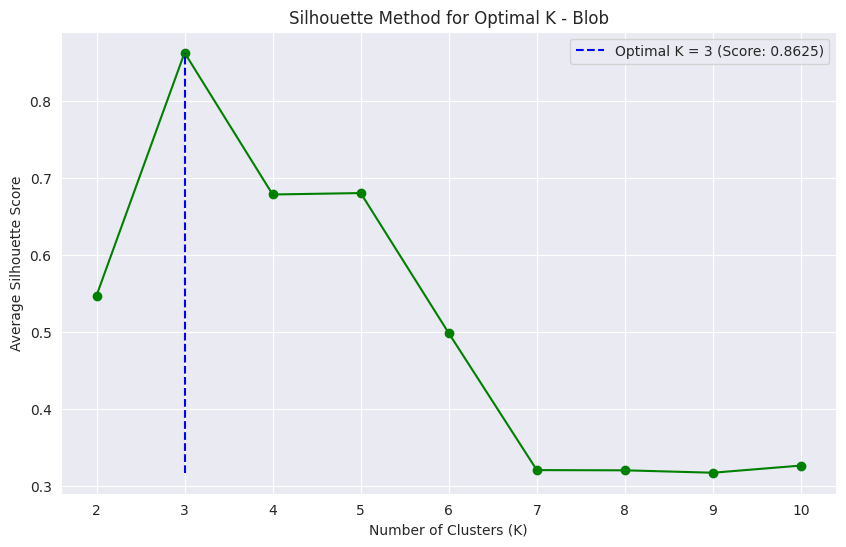


Optimal K for Blob: 3
--------------------------------------------------


3

In [16]:
find_optimal_k_silhouette(blob, dataset_name="Blob")

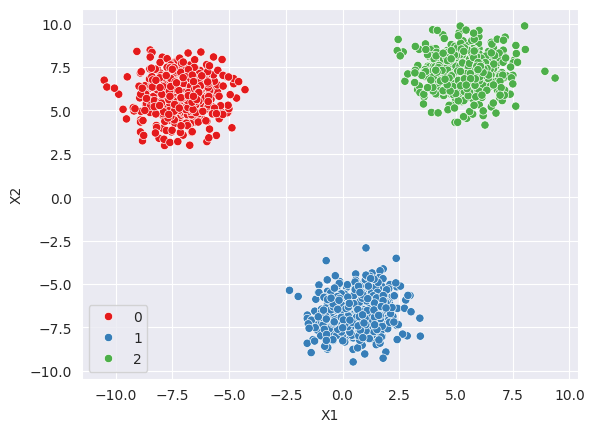

In [19]:
model = KMedoids(n_clusters=3)
display_categories(model, blob)

**Find Optimal K-value and Clusters for Moon**

--- Analyzing Moon (K = 1 to 10) ---
K=1: Inertia = 1438.53
K=2: Inertia = 910.01
K=3: Inertia = 781.47
K=4: Inertia = 578.24
K=5: Inertia = 488.22
K=6: Inertia = 442.65
K=7: Inertia = 355.28
K=8: Inertia = 325.80
K=9: Inertia = 308.71
K=10: Inertia = 302.95


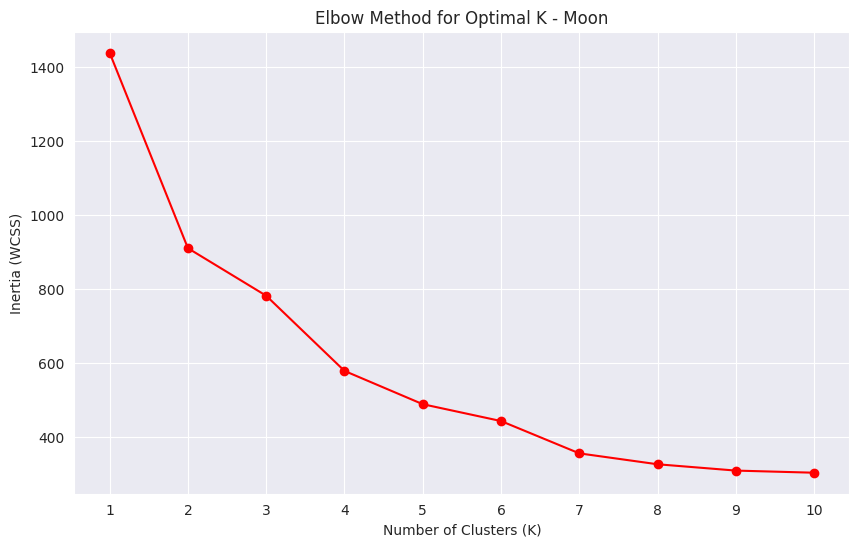


Interpretation: The optimal K is found at the **'elbow'** or **'knee'** of the curve, where the decrease in WCSS starts to flatten significantly.
--------------------------------------------------


In [20]:
find_optimal_k_elbow(moon, dataset_name="Moon")

--- Analyzing Moon (K = 2 to 10) ---
K=2: Average Silhouette Score = 0.4855
K=3: Average Silhouette Score = 0.3657
K=4: Average Silhouette Score = 0.4677
K=5: Average Silhouette Score = 0.4871
K=6: Average Silhouette Score = 0.4647
K=7: Average Silhouette Score = 0.5231
K=8: Average Silhouette Score = 0.5154
K=9: Average Silhouette Score = 0.5036
K=10: Average Silhouette Score = 0.4830


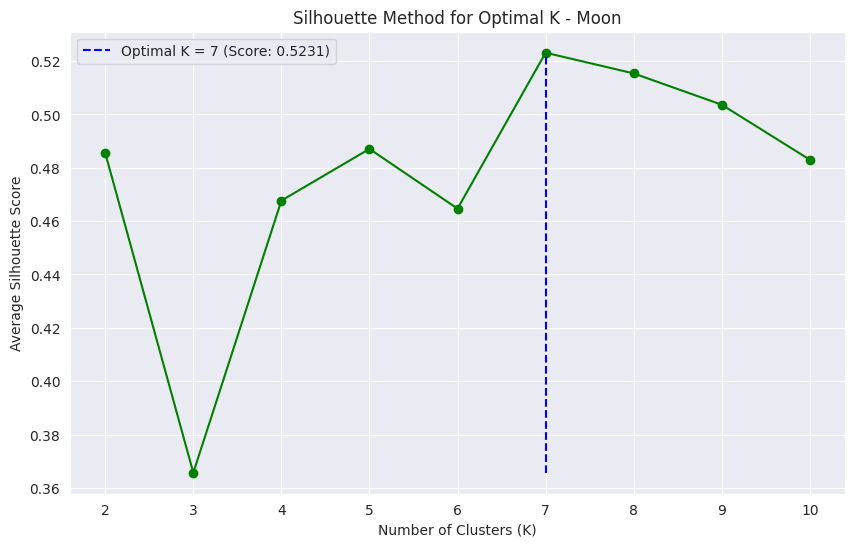


Optimal K for Moon: 7
--------------------------------------------------


7

In [21]:
find_optimal_k_silhouette(moon, dataset_name="Moon")

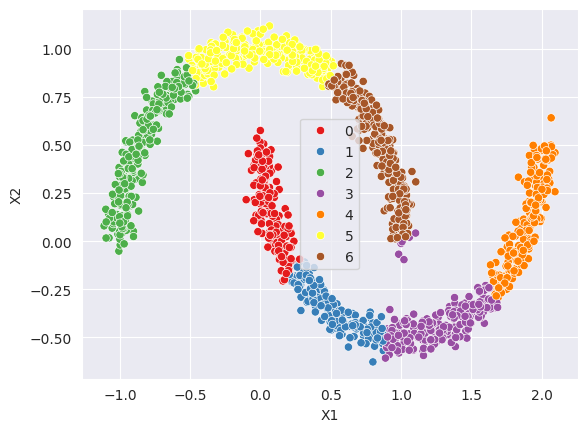

In [22]:
model = KMedoids(n_clusters=7)
display_categories(model, moon)

**Finding Optimal K-Value and Clusters For Circle**

--- Analyzing Circle (K = 1 to 10) ---
K=1: Inertia = 994.49
K=2: Inertia = 798.90
K=3: Inertia = 684.49
K=4: Inertia = 629.36
K=5: Inertia = 599.80
K=6: Inertia = 540.85
K=7: Inertia = 484.75
K=8: Inertia = 425.16
K=9: Inertia = 412.90
K=10: Inertia = 359.31


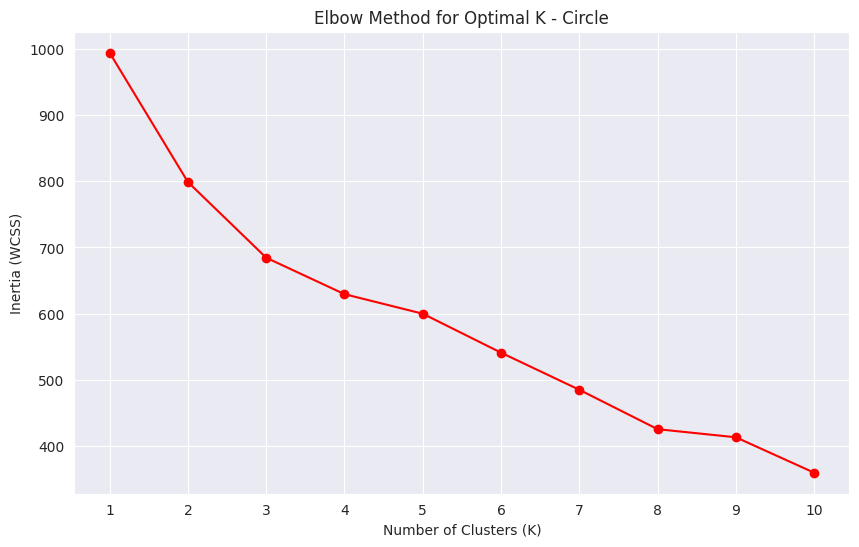


Interpretation: The optimal K is found at the **'elbow'** or **'knee'** of the curve, where the decrease in WCSS starts to flatten significantly.
--------------------------------------------------


In [23]:
find_optimal_k_elbow(circle, dataset_name="Circle")

--- Analyzing Circle (K = 2 to 10) ---
K=2: Average Silhouette Score = 0.2936
K=3: Average Silhouette Score = 0.3166
K=4: Average Silhouette Score = 0.2923
K=5: Average Silhouette Score = 0.2595
K=6: Average Silhouette Score = 0.2487
K=7: Average Silhouette Score = 0.2570
K=8: Average Silhouette Score = 0.3123
K=9: Average Silhouette Score = 0.2918
K=10: Average Silhouette Score = 0.3569


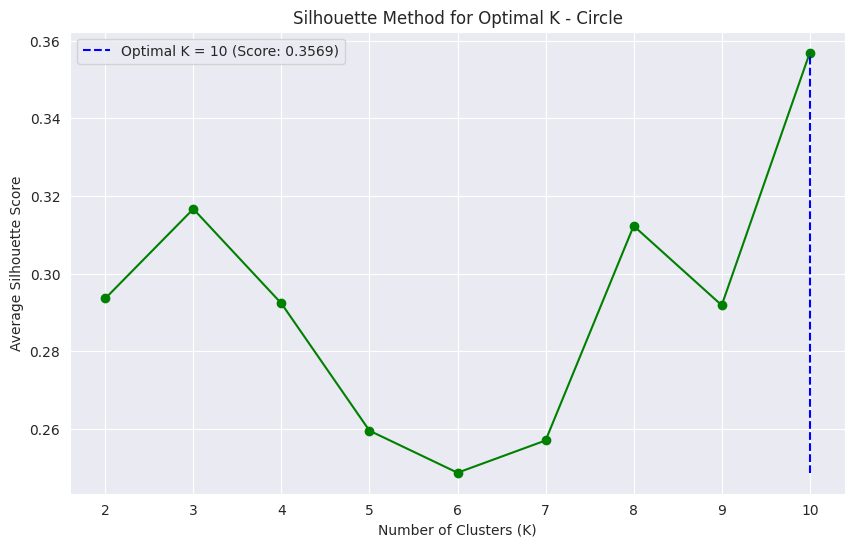


Optimal K for Circle: 10
--------------------------------------------------


10

In [24]:
find_optimal_k_silhouette(circle, dataset_name="Circle")

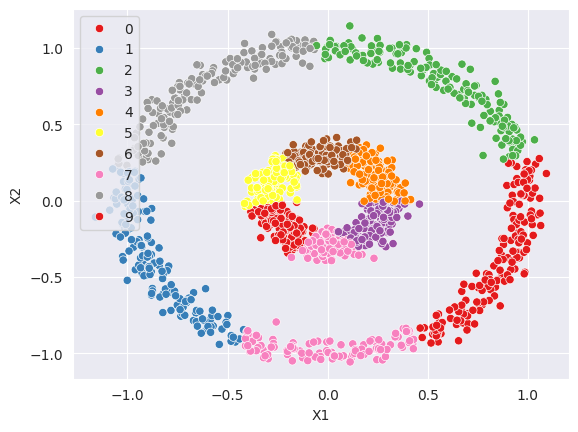

In [25]:
model = KMedoids(n_clusters=10)
display_categories(model, circle)

# **Analyzing Clusters By DBSCAN Algorithm**

In [26]:
from sklearn.cluster import DBSCAN

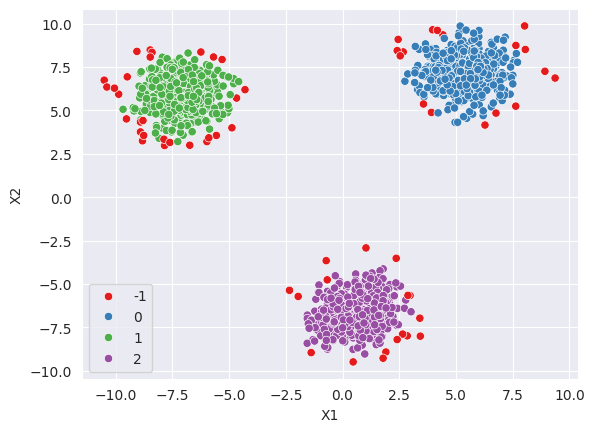

In [27]:
# Default values of eps= 0.5, min_sample=5
model = DBSCAN()
display_categories(model, blob)

**Function to Find Optimal Epsilon and MinPts for any Dataset**

In [28]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_for_dbscan(data, min_pts=None, dataset_name="Dataset"):
    if min_pts is None:
        # Default rule of thumb: MinPts >= 2 * Dimension
        min_pts = 2 * data.shape[1]
        print(f"MinPts defaulted to 2 * Dimension = {min_pts}")
    else:
        print(f"MinPts set to {min_pts}")

    # Ensure data is a NumPy array for consistent processing
    if isinstance(data, pd.DataFrame):
        data = data.values

    neighbors = NearestNeighbors(n_neighbors=min_pts)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    k_distance = np.sort(distances[:, min_pts - 1], axis=0)

    # 5. Plot the k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_distance, color='teal', marker='.', markersize=2)

    plt.title(f'K-Distance Graph for DBSCAN - {dataset_name} (K = {min_pts})')
    plt.xlabel('Data Points Sorted by Distance (Index)')
    plt.ylabel(f'{min_pts}-th Nearest Neighbor Distance (Epsilon Candidate)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print("\nInterpretation:")
    print("The optimal Epsilon (Eps) value is the distance corresponding to the 'knee' or 'elbow' point of the curve.")
    print("This is where the plot sharply changes slope, separating core points from noise.")
    print("-" * 50)

**Finding Optimal Values and Clusters For Blob**

MinPts defaulted to 2 * Dimension = 4


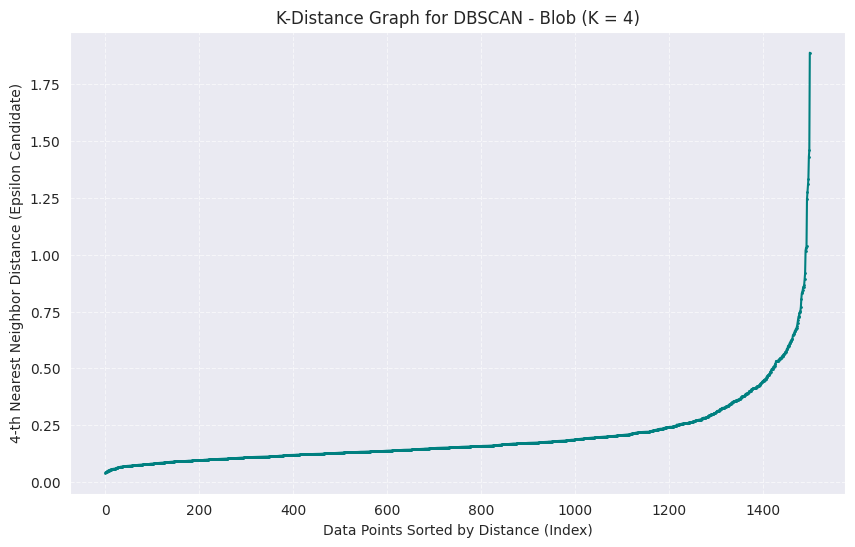


Interpretation:
The optimal Epsilon (Eps) value is the distance corresponding to the 'knee' or 'elbow' point of the curve.
This is where the plot sharply changes slope, separating core points from noise.
--------------------------------------------------


In [29]:
plot_k_distance_for_dbscan(blob, dataset_name="Blob")

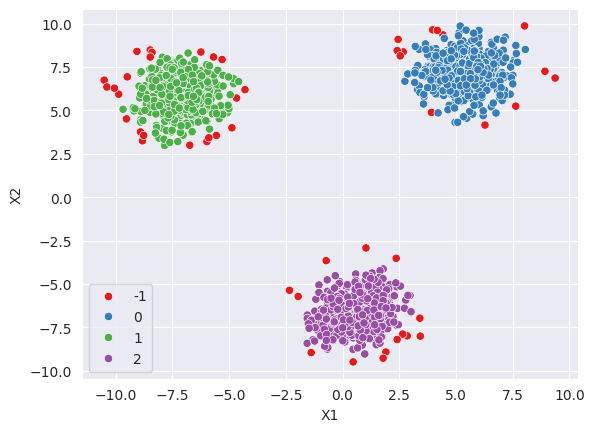

In [30]:
model = DBSCAN(eps = 0.50, min_samples = 4)
display_categories(model, blob)

**Finding Optimal Values and Clusters For Moon**

MinPts defaulted to 2 * Dimension = 4


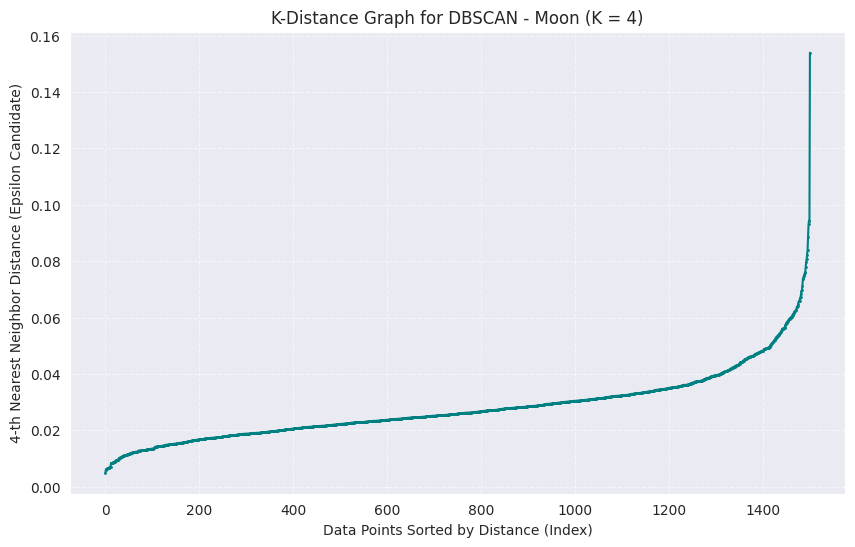


Interpretation:
The optimal Epsilon (Eps) value is the distance corresponding to the 'knee' or 'elbow' point of the curve.
This is where the plot sharply changes slope, separating core points from noise.
--------------------------------------------------


In [31]:
plot_k_distance_for_dbscan(moon, dataset_name="Moon")

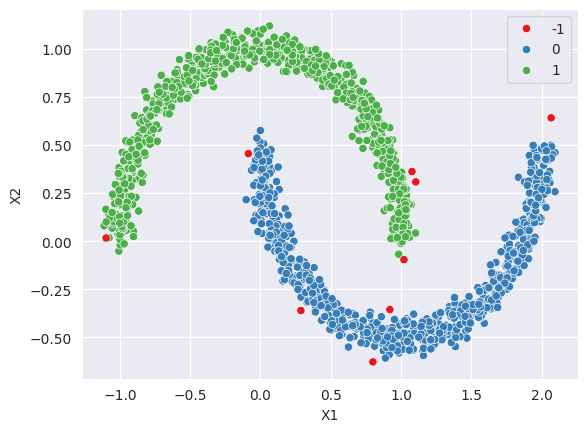

In [36]:
model = DBSCAN(eps = 0.06, min_samples = 4)
display_categories(model, moon)

**Finding Optimal Values and Clusters For Circle**

MinPts defaulted to 2 * Dimension = 4


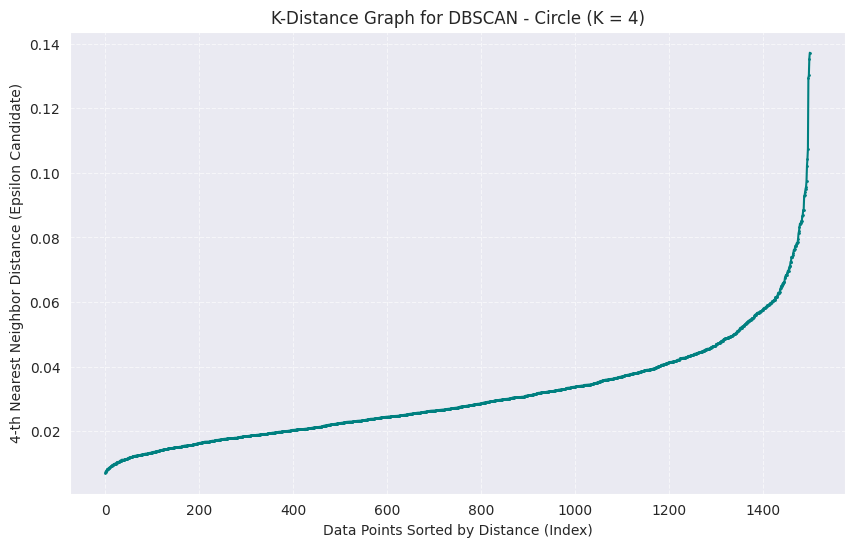


Interpretation:
The optimal Epsilon (Eps) value is the distance corresponding to the 'knee' or 'elbow' point of the curve.
This is where the plot sharply changes slope, separating core points from noise.
--------------------------------------------------


In [37]:
plot_k_distance_for_dbscan(circle, dataset_name="Circle")

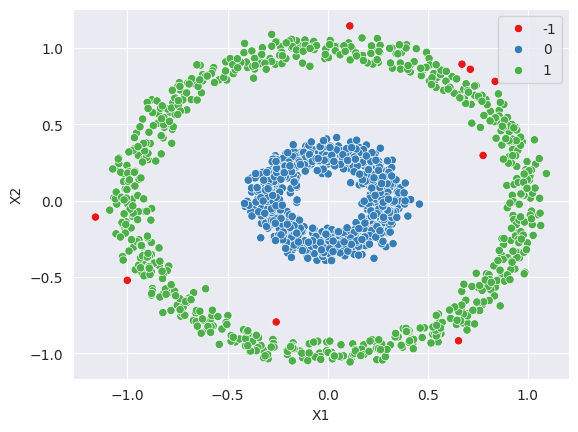

In [39]:
model = DBSCAN(eps = 0.08, min_samples = 4)
display_categories(model, circle)

# **Conclusion**

K-Medoids, as a centroid-based algorithm, inherently struggles with clusters that are non-spherical or have arbitrary shapes (like Moon or Circle patterns) because its objective function is geometrically biased towards finding round structures.

In contrast, the DBSCAN Algorithm defines clusters based purely on density connectivity, enabling it to correctly identify clusters of any shape, making it generally superior for complex datasets.

While K-Medoids requires external methods like the Elbow or Silhouette score to tune its parameter K (number of clusters), DBSCAN has its own systematic diagnostic technique—the k-distance graph—which helps reliably determine the optimal density parameters, ϵ (radius) and MinPts (minimum points), leading to more robust results across various data structures.